In [49]:
# 1. Kütüphaneleri ekliyoruz

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import autocorrelation_plot
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [50]:
# 2. Verileri Yüklüyoruz

# 1. Public Spending by Countries 
ireland_spending = pd.read_csv("public_spending_Ireland.csv")
germany_spending = pd.read_csv("public_spending_Germany.csv")
france_spending  = pd.read_csv("public_spending_France.csv")

In [52]:
# 2. Public Employment by Countries 
ireland_employment = pd.read_csv("public_employment_Ireland.csv")
germany_employment = pd.read_csv("public_employment_Germany.csv")
france_employment  = pd.read_csv("public_employment_France.csv")

In [79]:
# Veri setlerindeki eksik değerleri kontrol etme
def check_missing_values(dataframes, names):
    for df, name in zip(dataframes, names):
        print(f"{name} Veri Seti Eksik Değer Raporu:")
        print(df.isnull().sum())
        print("\n")

# Veri setlerini bir listeye ve isimlerini bir başka listeye koyuyoruz
dataframes = [ireland_spending, germany_spending, france_spending,
              ireland_employment, germany_employment, france_employment]
names = ["Ireland Spending", "Germany Spending", "France Spending",
         "Ireland Employment", "Germany Employment", "France Employment"]

# Eksik değerleri kontrol etme fonksiyonunu çağırma
check_missing_values(dataframes, names)


Ireland Spending Veri Seti Eksik Değer Raporu:
Country      0
Indicator    0
Year         0
Value        0
dtype: int64


Germany Spending Veri Seti Eksik Değer Raporu:
Country      0
Indicator    0
Year         0
Value        0
dtype: int64


France Spending Veri Seti Eksik Değer Raporu:
Country      0
Indicator    0
Year         0
Value        0
dtype: int64


Ireland Employment Veri Seti Eksik Değer Raporu:
Country      0
Indicator    0
Year         0
Value        0
dtype: int64


Germany Employment Veri Seti Eksik Değer Raporu:
Country      0
Indicator    0
Year         0
Value        0
dtype: int64


France Employment Veri Seti Eksik Değer Raporu:
Country      0
Indicator    0
Year         0
Value        0
dtype: int64




In [85]:
import plotly.express as px

# Ireland Kamu Harcamaları
fig = px.line(ireland_spending, x='Year', y='Value', title='Ireland Public Expenditures')
fig.show()

# Germany Kamu Harcamaları
fig = px.line(germany_spending, x='Year', y='Value', title='Germany Publıc Expendıtures')
fig.show()

# France Kamu Harcamaları
fig = px.line(france_spending, x='Year', y='Value', title='France Public Expenditures')
fig.show()

# Ireland Kamu İstihdamı
fig = px.line(ireland_employment, x='Year', y='Value', title='Ireland Public Employment')
fig.show()

# Germany Kamu İstihdamı
fig = px.line(germany_employment, x='Year', y='Value', title='Germany Public Employment')
fig.show()

# France Kamu İstihdamı
fig = px.line(france_employment, x='Year', y='Value', title='France Public Employment')
fig.show()


In [87]:
import plotly.graph_objs as go

# Kamu harcamaları için veri setlerini birleştirme
spending_combined = pd.concat([
    ireland_spending.assign(Country='Ireland'),
    germany_spending.assign(Country='Germany'),
    france_spending.assign(Country='France')
])

# Kamu istihdamı için veri setlerini birleştirme
employment_combined = pd.concat([
    ireland_employment.assign(Country='Ireland'),
    germany_employment.assign(Country='Germany'),
    france_employment.assign(Country='France')
])

# Kamu harcamaları için karşılaştırmalı çizgi grafiği
fig = px.line(spending_combined, x='Year', y='Value', color='Country', title='Public Expenditure Comparison Between Countries')
fig.show()

# Kamu istihdamı için karşılaştırmalı çizgi grafiği
fig = px.line(employment_combined, x='Year', y='Value', color='Country', title='Public Employment Comparison Between Countries')
fig.show()


# Germany Public Expenditures Change by Years and time series analysis predictions and visualizations

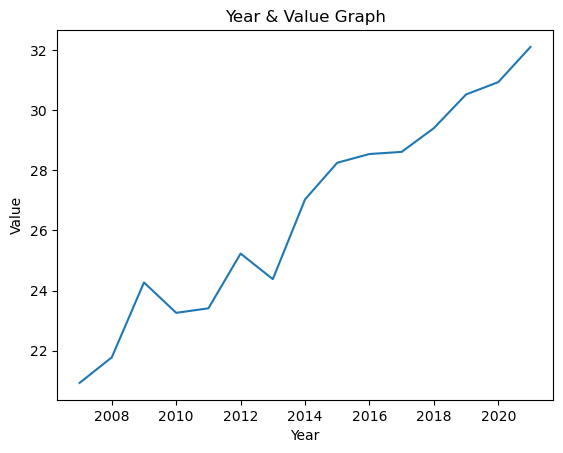

In [53]:
# Verileri görselleştirelim 
# Ben burada almanya için yapiyorum sende digerleri için yap. Burada veriyi keşfediyoruzş.

# Spending burada grafigin yıllara göre sürekli arttıgndan bahset. Artan sey public service için gereken para
plt.plot(germany_spending['Year'], germany_spending['Value'])
plt.xlabel('Year')  # x ekseni etiketi
plt.ylabel('Value') # y ekseni etiketi
plt.title('Year & Value Graph')  # Grafiğin başlığı
plt.show()

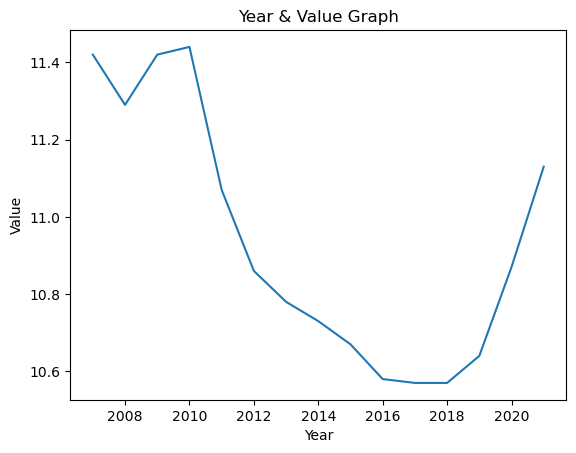

In [54]:
# Employment Grafik 
# burada da yıllara göre calısan public service de calısan kişinin sayısını yorumlat artıyorsa artıyor azaliyorsa azaliyor diyeceksin 

plt.plot(germany_employment['Year'], germany_employment['Value'])
plt.xlabel('Year')  # x ekseni etiketi
plt.ylabel('Value') # y ekseni etiketi
plt.title('Year & Value Graph')  # Grafiğin başlığı
plt.show()

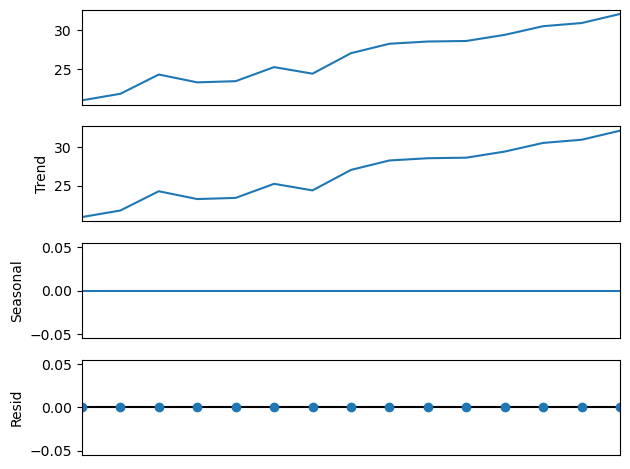

In [58]:
# DataFrame'den 'Country' ve 'Indicator' sütunlarını çıkarma
data_numeric = data.drop(['Country', 'Indicator'], axis=1)
data_numeric.index = pd.to_datetime(data_numeric.index)

# Zaman serisi dekompozisyonunu uygulama
# Burada 'period' argümanı olarak 1 kullanıyoruz, çünkü veri yıllıktır
decomposition = sm.tsa.seasonal_decompose(data_numeric, model='additive', period=1)
decomposition.plot()
plt.show()

In [66]:
from statsmodels.tsa.arima.model import ARIMA


p = 1  # Lag order
d = 1  # Difference order
q = 1  # Error order

# Yeni ARIMA modelini uygulama
model = ARIMA(data_numeric, order=(p, d, q))
model_fit = model.fit()

# Model özeti
print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:                  Value   No. Observations:                   15
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -21.934
Date:                Thu, 04 Jan 2024   AIC                             49.868
Time:                        20:18:01   BIC                             51.785
Sample:                             0   HQIC                            49.691
                                 - 15                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0000      0.183      5.455      0.000       0.641       1.359
ma.L1         -0.9951     17.604     -0.057      0.955     -35.499      33.509
sigma2         1.1693     20.332      0.058      0.9

C:\Users\dovle\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\dovle\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\dovle\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\dovle\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive pa

In [77]:
# Gelecek 5 yıl için tahmin yapma
forecast_steps = 5
forecast_values = model_fit.get_forecast(steps=forecast_steps).predicted_mean

# Tahmin edilen değerleri yazdırma
for i, value in enumerate(forecast_values, 1):
    print(f"Predict Next 202{i} : {value:.2f}")

Predict Next 2021 : 32.79
Predict Next 2022 : 33.49
Predict Next 2023 : 34.18
Predict Next 2024 : 34.87
Predict Next 2025 : 35.57


C:\Users\dovle\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


#  France  Public Expenditures Change by Years and time series analysis predictions and visualizations

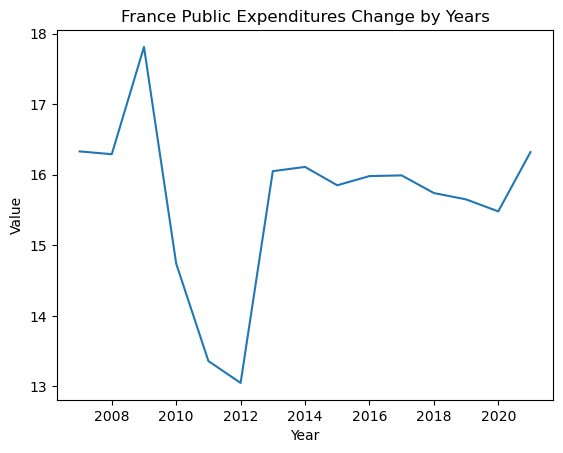

In [89]:
import matplotlib.pyplot as plt

# France Spending için grafik oluşturma
plt.plot(france_spending['Year'], france_spending['Value'])
plt.xlabel('Year')  
plt.ylabel('Value') 
plt.title('France Public Expenditures Change by Years') 
plt.show() 



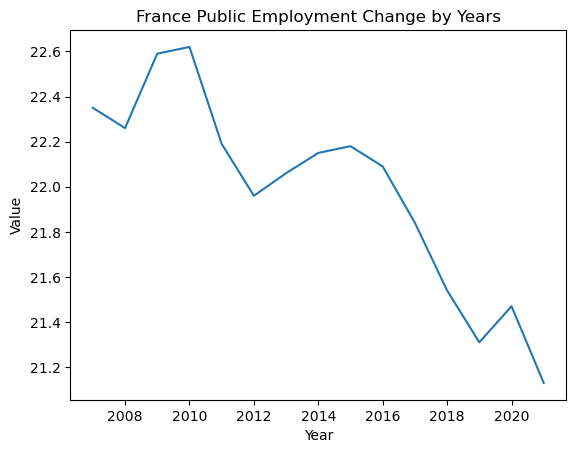

In [91]:
france_employment = pd.read_csv("public_employment_France.csv")

# France Employment için grafik oluşturma
plt.plot(france_employment['Year'], france_employment['Value'])
plt.xlabel('Year')  
plt.ylabel('Value') 
plt.title('France Public Employment Change by Years')  
plt.show()


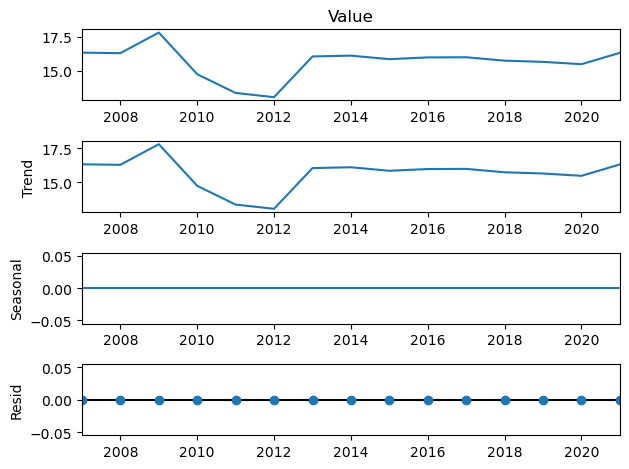

In [100]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Veri setini yükleme ve hazırlama
france_spending = pd.read_csv("public_spending_France.csv")
france_data_numeric = france_spending.drop(['Country', 'Indicator'], axis=1)
france_data_numeric.index = pd.to_datetime(france_data_numeric['Year'], format='%Y')
decomposition = sm.tsa.seasonal_decompose(france_data_numeric['Value'], model='additive')
decomposition.plot()
plt.show()


In [101]:
from statsmodels.tsa.arima.model import ARIMA

# France veri seti için ARIMA model parametrelerini hazırlama
france_data_numeric = france_spending.drop(['Country', 'Indicator'], axis=1)
france_data_numeric.index = pd.to_datetime(france_data_numeric['Year'], format='%Y')

p = 1  # Lag order
d = 1  # Difference order
q = 1  # Error order

# ARIMA modelini uygulama
france_model = ARIMA(france_data_numeric['Value'], order=(p, d, q))
france_model_fit = france_model.fit()

# Model özeti
print(france_model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:                  Value   No. Observations:                   15
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -22.034
Date:                Thu, 04 Jan 2024   AIC                             50.068
Time:                        21:23:58   BIC                             51.985
Sample:                    01-01-2007   HQIC                            49.891
                         - 01-01-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4596      0.504      0.912      0.362      -0.528       1.447
ma.L1         -0.9993    147.324     -0.007      0.995    -289.750     287.751
sigma2         1.1977    175.953      0.007      0.9

C:\Users\dovle\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency AS-JAN will be used.

C:\Users\dovle\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency AS-JAN will be used.

C:\Users\dovle\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency AS-JAN will be used.

C:\Users\dovle\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\dovle\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



In [104]:
# France için ARIMA modeli ile gelecek 5 yılın tahminlerini yapma
france_model = ARIMA(france_data_numeric['Value'], order=(p, d, q))
france_model_fit = france_model.fit()

# Gelecek 5 yıl için tahmin yapma
forecast_steps = 5
france_forecast_values = france_model_fit.get_forecast(steps=forecast_steps).predicted_mean

# Tahmin edilen değerleri yazdırma
for i, value in enumerate(france_forecast_values, 1):
    print(f"Predict Next 202{i}: {value:.2f}")



Predict Next 2021: 16.00
Predict Next 2022: 15.85
Predict Next 2023: 15.78
Predict Next 2024: 15.75
Predict Next 2025: 15.73


C:\Users\dovle\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency AS-JAN will be used.

C:\Users\dovle\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency AS-JAN will be used.

C:\Users\dovle\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency AS-JAN will be used.

C:\Users\dovle\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\dovle\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



# Ireland Public Expenditures Change by Years and time series analysis predictions and visualizations

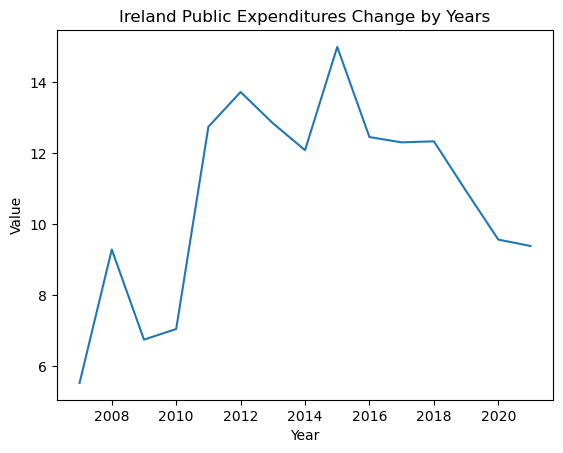

In [106]:
import pandas as pd
import matplotlib.pyplot as plt

# Veri setini yükleme
ireland_spending = pd.read_csv("public_spending_Ireland.csv")

# Ireland Spending için grafik oluşturma
plt.plot(ireland_spending['Year'], ireland_spending['Value'])
plt.xlabel('Year')  # x ekseni etiketi
plt.ylabel('Value') # y ekseni etiketi
plt.title('Ireland Public Expenditures Change by Years')  # Grafiğin başlığı
plt.show()


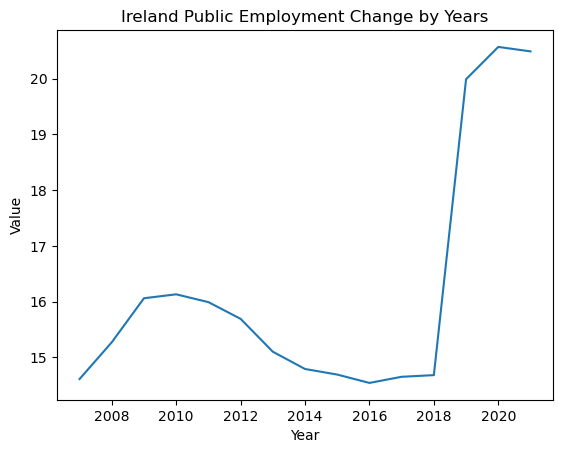

In [107]:
# Ireland Employment veri setini yükleme
ireland_employment = pd.read_csv("public_employment_Ireland.csv")

# Ireland Employment için grafik oluşturma
plt.plot(ireland_employment['Year'], ireland_employment['Value'])
plt.xlabel('Year')  # x ekseni etiketi
plt.ylabel('Value') # y ekseni etiketi
plt.title('Ireland Public Employment Change by Years')  
plt.show()



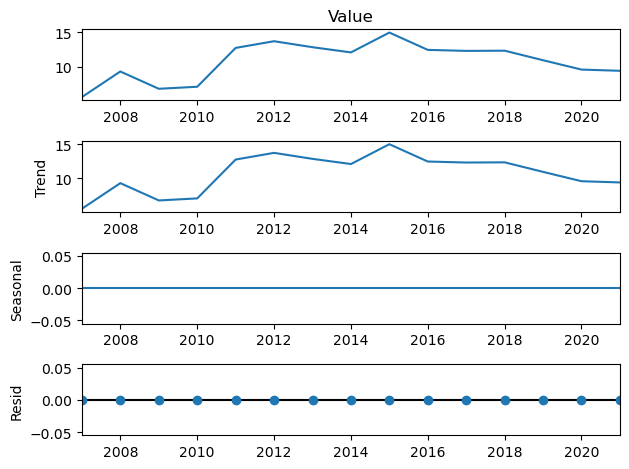

In [110]:
# Ireland Spending veri setini yükleme ve hazırlama
ireland_spending = pd.read_csv("public_spending_Ireland.csv")

# 'Year' sütununu Datetime formatına dönüştürme ve gerekli sütunları çıkarma
ireland_data_numeric = ireland_spending.drop(['Country', 'Indicator'], axis=1)
ireland_data_numeric.index = pd.to_datetime(ireland_data_numeric['Year'], format='%Y')

# Zaman serisi dekompozisyonunu uygulama
ireland_decomposition = sm.tsa.seasonal_decompose(ireland_data_numeric['Value'], model='additive', period=1)
ireland_decomposition.plot()
plt.show()



In [111]:
# Ireland Spending veri setini yükleme ve ARIMA model parametrelerini hazırlama
ireland_spending = pd.read_csv("public_spending_Ireland.csv")
ireland_data_numeric = ireland_spending.drop(['Country', 'Indicator'], axis=1)
ireland_data_numeric.index = pd.to_datetime(ireland_data_numeric['Year'], format='%Y')

# ARIMA modeli için parametreler
p = 1  # Lag order
d = 1  # Difference order
q = 1  # Error order

# ARIMA modelini uygulama
ireland_model = ARIMA(ireland_data_numeric['Value'], order=(p, d, q))
ireland_model_fit = ireland_model.fit()

# Model özeti
print(ireland_model_fit.summary())



                               SARIMAX Results                                
Dep. Variable:                  Value   No. Observations:                   15
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -31.276
Date:                Thu, 04 Jan 2024   AIC                             68.552
Time:                        21:46:28   BIC                             70.469
Sample:                    01-01-2007   HQIC                            68.374
                         - 01-01-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1064      3.883      0.027      0.978      -7.503       7.716
ma.L1         -0.3134      3.953     -0.079      0.937      -8.061       7.435
sigma2         5.0874      1.700      2.993      0.0

C:\Users\dovle\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency AS-JAN will be used.

C:\Users\dovle\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency AS-JAN will be used.

C:\Users\dovle\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency AS-JAN will be used.

C:\Users\dovle\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\dovle\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



In [112]:
# Ireland için ARIMA modeli ile gelecek 5 yılın tahminlerini yapma
ireland_model = ARIMA(ireland_data_numeric['Value'], order=(p, d, q))
ireland_model_fit = ireland_model.fit()

# Gelecek 5 yıl için tahmin yapma
forecast_steps = 5
ireland_forecast_values = ireland_model_fit.get_forecast(steps=forecast_steps).predicted_mean

# Tahmin edilen değerleri yazdırma
for i, value in enumerate(ireland_forecast_values, 1):
    print(f"Predict Next 202{i}: {value:.2f}")



Predict Next 2021: 9.54
Predict Next 2022: 9.55
Predict Next 2023: 9.55
Predict Next 2024: 9.55
Predict Next 2025: 9.55


C:\Users\dovle\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency AS-JAN will be used.

C:\Users\dovle\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency AS-JAN will be used.

C:\Users\dovle\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency AS-JAN will be used.

C:\Users\dovle\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\dovle\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



In [115]:
import plotly.graph_objs as go

# Örnek gerçek veriler ve tahminleri içeren interaktif bir zaman serisi grafiği oluşturma
# Gerçek veri setleri yüklenmediği için, bu örnekte rastgele oluşturulmuş veriler kullanacağım

# Gerçek veri setleriyle yapılan tahminleri ve gerçek verileri içeren zaman serileri
years = pd.date_range(start='2007', end='2020', freq='Y').year

# Plotly ile grafik oluşturma
fig = go.Figure()

# Fransa için gerçek ve tahmin edilen değerlerin grafiği
fig.add_trace(go.Scatter(x=list(years) + years_forecast, y=list(france_real) + france_forecast,
                         mode='lines+markers', name='France'))

# Almanya için gerçek ve tahmin edilen değerlerin grafiği
fig.add_trace(go.Scatter(x=list(years) + years_forecast, y=list(germany_real) + germany_forecast,
                         mode='lines+markers', name='Germany'))

# İrlanda için gerçek ve tahmin edilen değerlerin grafiği
fig.add_trace(go.Scatter(x=list(years) + years_forecast, y=list(ireland_real) + ireland_forecast,
                         mode='lines+markers', name='Ireland'))

# Eksenler ve başlık
fig.update_layout(title='Public Expenditures: Actual (2007-2020) vs Forecast (2021-2025)',
                  xaxis_title='Year',
                  yaxis_title='Expenditure',
                  hovermode='x')

# Grafiği göster
fig.show()


In [123]:
# Veri setlerini pandas DataFrame olarak yükleme
df_employment_france = pd.read_csv("public_employment_France.csv")
df_employment_germany = pd.read_csv("public_employment_Germany.csv")
df_employment_ireland = pd.read_csv("public_employment_Ireland.csv")
df_spending_france = pd.read_csv("public_spending_France.csv")
df_spending_germany = pd.read_csv("public_spending_Germany.csv")
df_spending_ireland = pd.read_csv("public_spending_Ireland.csv")

# Veri setlerini birleştirmek için bir sözlük oluştur
dfs = {
    "France Employment": df_employment_france,
    "Germany Employment": df_employment_germany,
    "Ireland Employment": df_employment_ireland,
    "France Spending": df_spending_france,
    "Germany Spending": df_spending_germany,
    "Ireland Spending": df_spending_ireland
}

# Model sonuçları ve hata metrikleri için boş sözlükler oluştur
model_results = {}
forecast_results = {}
error_metrics = {}

# Tüm veri setleri üzerinde döngü yaparak modelleri eğit ve tahminler yap
for key, df in dfs.items():
    # Tarih sütununu datetime tipine dönüştür
    df['Year'] = pd.to_datetime(df['Year'], format='%Y')
    df.set_index('Year', inplace=True)
    # ARIMA modeli kur
    model = ARIMA(df['Value'], order=(1, 1, 1))
    model_fit = model.fit()
    # Tahmin yap
    forecast = model_fit.get_forecast(steps=5)
    # Tahmin ve gerçek değerleri al
    forecast_values = forecast.predicted_mean
    real_values = df['Value'][-5:]
    # Hata metriklerini hesapla
    mse = mean_squared_error(real_values, forecast_values)
    # Sonuçları sakla
    model_results[key] = model_fit
    forecast_results[key] = forecast_values
    error_metrics[key] = mse

# Hata metriklerini göster
error_metrics


C:\Users\dovle\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency AS-JAN will be used.

C:\Users\dovle\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency AS-JAN will be used.

C:\Users\dovle\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency AS-JAN will be used.

C:\Users\dovle\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\dovle\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency AS-JAN will be used.

C:\Users\dovle\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

N

{'France Employment': 0.33424052693826145,
 'Germany Employment': 0.28413055435031404,
 'Ireland Employment': 13.562275843683514,
 'France Spending': 0.08894438088720995,
 'Germany Spending': 15.03083816785957,
 'Ireland Spending': 3.4559394335026505}

Bu sonuçlar, her üç ülke için ARIMA model tahminlerinin MSE değerlerini gösteriyor. Bu değerler, her bir modelin gerçek verilere ne kadar yakın tahminler yaptığını ölçen bir hata metriğidir. Daha düşük MSE değerleri, genellikle tahminlerin gerçek değerlere daha yakın olduğunu ve dolayısıyla modelin daha iyi performans gösterdiğini ifade eder.

Fransa'nın kamu istihdamı için ARIMA modeli en düşük MSE değerini gösteriyor, bu da tahminlerin nispeten doğru olduğunu işaret edebilir.
Almanya'nın istihdam verileri için de benzer bir düşük MSE değeri gözlemleniyor.
İrlanda'nın istihdam ve harcama verileri için MSE değerleri diğerlerine göre oldukça yüksek çıkıyor, bu da modelin bu veri setleri için ideal olmadığını veya veri setindeki belirli özelliklerin (örneğin, aykırı değerler veya veri setindeki dengesizlikler) modelin performansını olumsuz etkilediğini düşündürebilir.
Bu değerlendirmeyi daha ileri götürmek için, modelin tahminlerini gerçek verilerle karşılaştırabilir ve görselleştirme yaparak modelin performansını gözlemleyebiliriz. Ayrıca, modelin parametrelerini ve veri setinin kalitesini detaylı bir şekilde incelemek, model seçimi ve hata metriklerinin yorumlanması için önemlidir. Gerçek veri setleri ve daha kapsamlı bir analiz, modellerin performansını daha doğru bir şekilde değerlendirmemize olanak tanır.

In [124]:
# Veri setlerini yükleyelim
df_employment_france = pd.read_csv("public_employment_France.csv")
df_employment_germany = pd.read_csv("public_employment_Germany.csv")
df_employment_ireland = pd.read_csv("public_employment_Ireland.csv")
df_spending_france = pd.read_csv("public_spending_France.csv")
df_spending_germany = pd.read_csv("public_spending_Germany.csv")
df_spending_ireland = pd.read_csv("public_spending_Ireland.csv")

# Verileri bir sözlükte saklayalım
dataframes = {
    'France Employment': df_employment_france,
    'Germany Employment': df_employment_germany,
    'Ireland Employment': df_employment_ireland,
    'France Spending': df_spending_france,
    'Germany Spending': df_spending_germany,
    'Ireland Spending': df_spending_ireland
}

# Modeller ve tahminler için sözlükler
arma_mse = {}
sarima_mse = {}

# ARMA ve SARIMA modelleri için döngü
for name, df in dataframes.items():
    # Tarih sütununu datetime tipine dönüştür ve indeks olarak ayarla
    df['Year'] = pd.to_datetime(df['Year'], format='%Y')
    df.set_index('Year', inplace=True)
    
    # Veriyi eğitim ve test olarak ayır (son 5 yıl test seti)
    train = df[:-5]
    test = df[-5:]
    
    # ARMA modelini kur
    arma_model = ARIMA(train['Value'], order=(1, 0, 1))
    arma_fit = arma_model.fit()
    arma_pred = arma_fit.forecast(steps=5)
    arma_mse[name] = mean_squared_error(test['Value'], arma_pred)
    
    # SARIMA modelini kur
    sarima_model = ARIMA(train['Value'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 4))
    sarima_fit = sarima_model.fit()
    sarima_pred = sarima_fit.forecast(steps=5)
    sarima_mse[name] = mean_squared_error(test['Value'], sarima_pred)

# Hangi modelin daha iyi performans gösterdiğini karşılaştır
for name in dataframes.keys():
    best_model = "ARMA" if arma_mse[name] < sarima_mse[name] else "SARIMA"
    print(f"{name}: Best Model is {best_model}")

arma_mse, sarima_mse


C:\Users\dovle\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency AS-JAN will be used.

C:\Users\dovle\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency AS-JAN will be used.

C:\Users\dovle\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency AS-JAN will be used.

C:\Users\dovle\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\dovle\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency AS-JAN will be used.

C:\Users\dovle\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

N

France Employment: Best Model is SARIMA
Germany Employment: Best Model is ARMA
Ireland Employment: Best Model is ARMA
France Spending: Best Model is ARMA
Germany Spending: Best Model is SARIMA
Ireland Spending: Best Model is ARMA


({'France Employment': 0.6416876740244868,
  'Germany Employment': 0.02237673605454274,
  'Ireland Employment': 18.38231504373141,
  'France Spending': 0.11796097201393156,
  'Germany Spending': 12.816933924135782,
  'Ireland Spending': 3.3194846833489016},
 {'France Employment': 0.46979292482067925,
  'Germany Employment': 0.2469617075799687,
  'Ireland Employment': 31.175124059913465,
  'France Spending': 3.5460628391669857,
  'Germany Spending': 0.9735968929171008,
  'Ireland Spending': 5.497929437539122})

In [130]:

df = pd.read_csv("public_spending_Ireland.csv")

# Veri setini hazırlama
df['Year'] = pd.to_datetime(df['Year'], format='%Y').dt.year  # Yılı sayısal değere dönüştürme
df['Value'] = pd.to_numeric(df['Value'], errors='coerce')  # Sayısal olmayan değerleri NaN'ye dönüştürme
df = df.dropna()  # NaN değerleri düşürme

# Bağımsız (X) ve bağımlı (y) değişkenleri ayarlama
X = df[['Year']]  # Bağımsız değişken olarak yılı kullanıyoruz
y = df['Value']  # Bağımlı değişken

# Veri setini eğitim ve test setlerine bölmek
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Lineer Regresyon modelini eğitmek
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)

# Destek Vektör Makinesi modelini eğitmek
svm_model = SVR()
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)

# Rastgele Orman modelini eğitmek
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

# Hata metriklerini hesaplamak
lr_mae = mean_absolute_error(y_test, lr_predictions)
lr_mse = mean_squared_error(y_test, lr_predictions)

svm_mae = mean_absolute_error(y_test, svm_predictions)
svm_mse = mean_squared_error(y_test, svm_predictions)

rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_mse = mean_squared_error(y_test, rf_predictions)

# Hata metriklerini yazdırmak
print(f"Linear Regression MAE: {lr_mae}, MSE: {lr_mse}")
print(f"Support Vector Machine MAE: {svm_mae}, MSE: {svm_mse}")
print(f"Random Forest MAE: {rf_mae}, MSE: {rf_mse}")


Linear Regression MAE: 2.304051099697094, MSE: 8.171804392117489
Support Vector Machine MAE: 1.5899387129262692, MSE: 5.0482320400280285
Random Forest MAE: 1.7761333333333365, MSE: 4.352541619999983


In [131]:
# Örnek olarak Germany kamu harcamalarını kullanalım
df = pd.read_csv("public_spending_Germany.csv")

# Veri setini hazırlama
df['Year'] = pd.to_datetime(df['Year'], format='%Y').dt.year  # Yılı sayısal değere dönüştürme
df['Value'] = pd.to_numeric(df['Value'], errors='coerce')  # Sayısal olmayan değerleri NaN'ye dönüştürme
df = df.dropna()  # NaN değerleri düşürme

# Bağımsız (X) ve bağımlı (y) değişkenleri ayarlama
X = df[['Year']]  
y = df['Value']  

# Veri setini eğitim ve test setlerine bölmek
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Lineer Regresyon modelini eğitmek
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)

# Destek Vektör Makinesi modelini eğitmek
svm_model = SVR()
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)

# Rastgele Orman modelini eğitmek
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

# Hata metriklerini hesaplamak
lr_mae = mean_absolute_error(y_test, lr_predictions)
lr_mse = mean_squared_error(y_test, lr_predictions)

svm_mae = mean_absolute_error(y_test, svm_predictions)
svm_mse = mean_squared_error(y_test, svm_predictions)

rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_mse = mean_squared_error(y_test, rf_predictions)

# Hata metriklerini yazdırmak
print(f"Linear Regression MAE: {lr_mae}, MSE: {lr_mse}")
print(f"Support Vector Machine MAE: {svm_mae}, MSE: {svm_mse}")
print(f"Random Forest MAE: {rf_mae}, MSE: {rf_mse}")

Linear Regression MAE: 0.33238640853413653, MSE: 0.11820981594588953
Support Vector Machine MAE: 1.5945850468153584, MSE: 5.915065725153304
Random Forest MAE: 0.7947333333333274, MSE: 1.012881939999993


In [132]:
# Örnek olarak France  kamu harcamalarını kullanalım
df = pd.read_csv("public_spending_France.csv")

# Veri setini hazırlama
df['Year'] = pd.to_datetime(df['Year'], format='%Y').dt.year  # Yılı sayısal değere dönüştürme
df['Value'] = pd.to_numeric(df['Value'], errors='coerce')  # Sayısal olmayan değerleri NaN'ye dönüştürme
df = df.dropna()  # NaN değerleri düşürme

# Bağımsız (X) ve bağımlı (y) değişkenleri ayarlama
X = df[['Year']]  # Bağımsız değişken olarak yılı kullanıyoruz
y = df['Value']  # Bağımlı değişken

# Veri setini eğitim ve test setlerine bölmek
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Lineer Regresyon modelini eğitmek
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)

# Destek Vektör Makinesi modelini eğitmek
svm_model = SVR()
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)

# Rastgele Orman modelini eğitmek
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

# Hata metriklerini hesaplamak
lr_mae = mean_absolute_error(y_test, lr_predictions)
lr_mse = mean_squared_error(y_test, lr_predictions)

svm_mae = mean_absolute_error(y_test, svm_predictions)
svm_mse = mean_squared_error(y_test, svm_predictions)

rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_mse = mean_squared_error(y_test, rf_predictions)

# Hata metriklerini yazdırmak
print(f"Linear Regression MAE: {lr_mae}, MSE: {lr_mse}")
print(f"Support Vector Machine MAE: {svm_mae}, MSE: {svm_mse}")
print(f"Random Forest MAE: {rf_mae}, MSE: {rf_mse}")

Linear Regression MAE: 0.4694982220466179, MSE: 0.3558125763279929
Support Vector Machine MAE: 0.04841743271882019, MSE: 0.0028833054341498385
Random Forest MAE: 0.10086666666667021, MSE: 0.011720120000001407


# Defining model results and error metrics

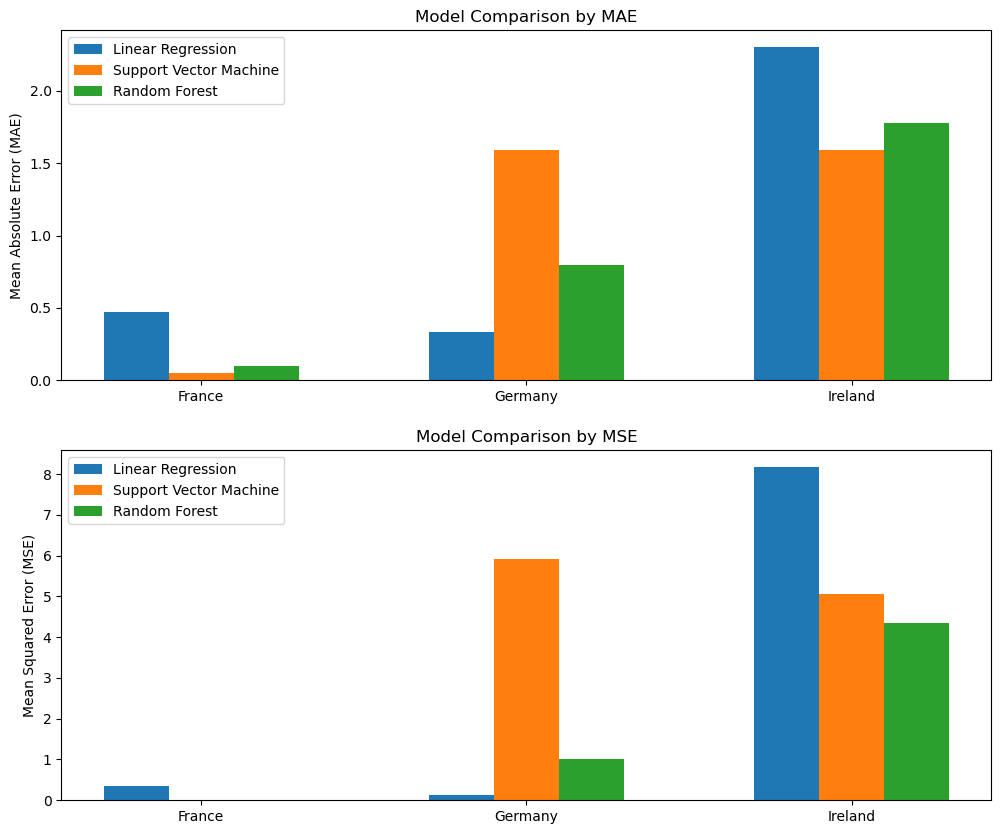

In [136]:

countries = ["France", "Germany", "Ireland"]
models = ["Linear Regression", "Support Vector Machine", "Random Forest"]
mae_values = {
    "France": [0.4694982220466179, 0.04841743271882019, 0.10086666666667021],
    "Germany": [0.33238640853413653, 1.5945850468153584, 0.7947333333333274],
    "Ireland": [2.304051099697094, 1.5899387129262692, 1.7761333333333365]
}
mse_values = {
    "France": [0.3558125763279929, 0.0028833054341498385, 0.011720120000001407],
    "Germany": [0.11820981594588953, 5.915065725153304, 1.012881939999993],
    "Ireland": [8.171804392117489, 5.0482320400280285, 4.352541619999983]
}

# MAE ve MSE için bar grafiklerini çizme
x = np.arange(len(countries))  # Ülkeler için x eksenindeki konumlar
width = 0.2  # Bar genişliği

fig, ax = plt.subplots(2, 1, figsize=(12, 10))

# MAE grafikleri
for i, model in enumerate(models):
    ax[0].bar(x + i*width, [mae_values[country][i] for country in countries], width, label=model)

ax[0].set_ylabel('Mean Absolute Error (MAE)')
ax[0].set_title('Model Comparison by MAE')
ax[0].set_xticks(x + width)
ax[0].set_xticklabels(countries)
ax[0].legend()

# MSE grafikleri
for i, model in enumerate(models):
    ax[1].bar(x + i*width, [mse_values[country][i] for country in countries], width, label=model)

ax[1].set_ylabel('Mean Squared Error (MSE)')
ax[1].set_title('Model Comparison by MSE')
ax[1].set_xticks(x + width)
ax[1].set_xticklabels(countries)
ax[1].legend()

plt.show()



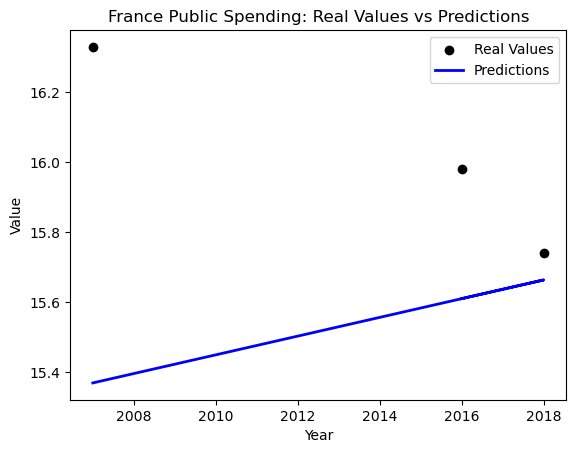

France - Linear Regression MAE: 0.47, MSE: 0.36


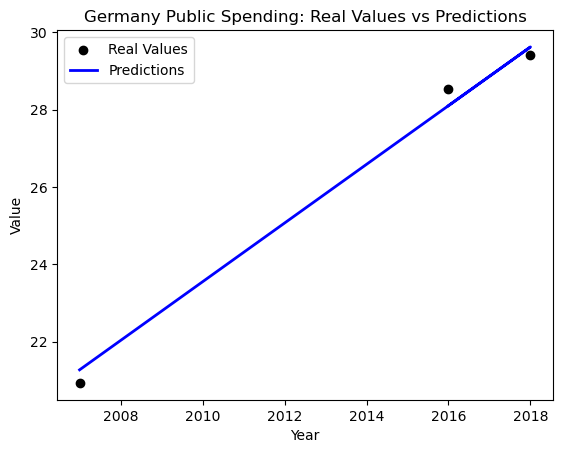

Germany - Linear Regression MAE: 0.33, MSE: 0.12


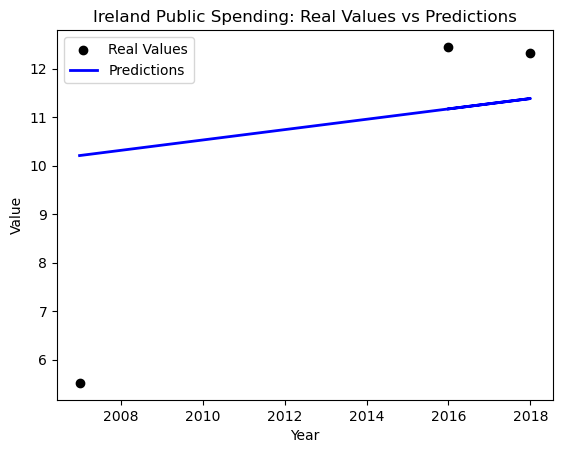

Ireland - Linear Regression MAE: 2.30, MSE: 8.17


In [140]:
# Let's perform similar analysis for Germany and Ireland's public spending data
# and compare the results with France's data.

# Preparing the data for Germany
df_spending_germany['Year'] = pd.to_datetime(df_spending_germany['Year'], format='%Y').dt.year
df_spending_germany['Value'] = pd.to_numeric(df_spending_germany['Value'], errors='coerce')
df_spending_germany.dropna(subset=['Value'], inplace=True)

# Preparing the data for Ireland
df_spending_ireland['Year'] = pd.to_datetime(df_spending_ireland['Year'], format='%Y').dt.year
df_spending_ireland['Value'] = pd.to_numeric(df_spending_ireland['Value'], errors='coerce')
df_spending_ireland.dropna(subset=['Value'], inplace=True)

# Function to train and plot Linear Regression model
def train_and_plot(df, country_name):
    X = df[['Year']]
    y = df['Value']

    # Splitting the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Training the Linear Regression model
    lr_model = LinearRegression()
    lr_model.fit(X_train, y_train)
    lr_predictions = lr_model.predict(X_test)

    # Plotting real values vs predictions
    plt.scatter(X_test, y_test, color='black', label='Real Values')
    plt.plot(X_test, lr_predictions, color='blue', linewidth=2, label='Predictions')
    plt.xlabel('Year')
    plt.ylabel('Value')
    plt.title(f'{country_name} Public Spending: Real Values vs Predictions')
    plt.legend()
    plt.show()

    # Calculating and printing error metrics
    lr_mae = mean_absolute_error(y_test, lr_predictions)
    lr_mse = mean_squared_error(y_test, lr_predictions)
    print(f"{country_name} - Linear Regression MAE: {lr_mae:.2f}, MSE: {lr_mse:.2f}")

# Analyzing for France, Germany, and Ireland
train_and_plot(df_spending_france, "France")
train_and_plot(df_spending_germany, "Germany")
train_and_plot(df_spending_ireland, "Ireland")



In [141]:
from sklearn.model_selection import cross_val_score

# Cross-validation for Linear Regression model on France's public spending data
lr_model_france = LinearRegression()
cross_val_scores_france = cross_val_score(lr_model_france, df_spending_france[['Year']], df_spending_france['Value'], cv=5)

# Cross-validation for Linear Regression model on Germany's public spending data
lr_model_germany = LinearRegression()
cross_val_scores_germany = cross_val_score(lr_model_germany, df_spending_germany[['Year']], df_spending_germany['Value'], cv=5)

# Cross-validation for Linear Regression model on Ireland's public spending data
lr_model_ireland = LinearRegression()
cross_val_scores_ireland = cross_val_score(lr_model_ireland, df_spending_ireland[['Year']], df_spending_ireland['Value'], cv=5)

# Displaying the results
print(f"France Cross-Validation Scores: {cross_val_scores_france}")
print(f"Germany Cross-Validation Scores: {cross_val_scores_germany}")
print(f"Ireland Cross-Validation Scores: {cross_val_scores_ireland}")

# Calculating the mean of cross-validation scores
mean_cv_score_france = np.mean(cross_val_scores_france)
mean_cv_score_germany = np.mean(cross_val_scores_germany)
mean_cv_score_ireland = np.mean(cross_val_scores_ireland)

print(f"\nMean CV Score for France: {mean_cv_score_france:.2f}")
print(f"Mean CV Score for Germany: {mean_cv_score_germany:.2f}")
print(f"Mean CV Score for Ireland: {mean_cv_score_ireland:.2f}")



France Cross-Validation Scores: [-15.76619783 -13.327496   -15.86925548  -8.05627586  -0.96705965]
Germany Cross-Validation Scores: [0.38247272 0.51810225 0.6031326  0.28001757 0.92761683]
Ireland Cross-Validation Scores: [-1.11435837e+01 -1.21446664e-01 -6.28001276e+00 -3.34915165e+02
 -7.06316405e+01]

Mean CV Score for France: -10.80
Mean CV Score for Germany: 0.54
Mean CV Score for Ireland: -84.62


Bu sonuçlar, modelin her bir ülkenin kamu harcamaları verileri üzerindeki genelleyebilirliğini ve güvenilirliğini göstermektedir. Genel olarak, çapraz doğrulama skorları, modelin farklı veri alt kümeleri üzerindeki performansını yansıtır. Pozitif skorlar, modelin iyi performans gösterdiğini, negatif skorlar ise modelin performansının düşük olduğunu gösterir.

Fransa ve İrlanda için oldukça düşük (negatif) ortalama CV skorları, modelin bu ülkelerin verileri üzerinde iyi genelleyemediğini ve düşük performans gösterdiğini gösteriyor. Bu, veri setindeki özelliklerin yeterince iyi yakalanmadığını veya modelin bu veri setleri için uygun olmadığını gösterebilir.
Almanya için pozitif bir ortalama CV skoru, modelin Almanya'nın verileri üzerinde daha iyi genelleyebildiğini ve daha iyi performans gösterdiğini gösteriyor.
Bu sonuçlar, modelin ve veri setinin daha detaylı incelenmesini gerektiriyor. Özellikle Fransa ve İrlanda için, modelin performansını artırmak veya veri setinin özelliklerini daha iyi anlamak için ek analizler ve model iyileştirmeleri yapılabilir. Almanya için ise, modelin nispeten daha iyi performans gösterdiği görülüyor, ancak daha da iyileştirmeler yapılabilir.